# Salary Age Regression

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#Making a training set and test set for age and salary
TrainAge = np.array([25,55,27,35,60,65,45,40,50,30])
TestAge = np.array([30,26,58,29,40,27,33,61,27,48])
TestSalary = np.array([166000,78000,310000,100000,260000,150000,140000,220000,86000,276000])
TrainSalary = np.array([135000,260000,105000,220000,240000,265000,270000,300000,265000,105000,])

age = np.concatenate((TrainAge,TestAge))
salary = np.concatenate((TestSalary, TrainSalary))

data = pd.DataFrame({'Age':age,'Salary':salary})

dataTrain, dataTest = data.iloc[:10], data.iloc[10:20]
xRaw, yRaw = dataTrain.drop('Salary',axis=1), dataTrain.drop('Age',axis=1)
xRawTest, yRawTest = dataTest.drop('Salary',axis=1), dataTest.drop('Age',axis=1)

In [ ]:

#normalize the feature
x = (TrainAge - TrainAge.mean(axis=0))/TrainAge.std(axis=0, ddof = 1) # normalize data
xTest = (TestAge - TrainAge.mean(axis=0))/TrainAge.std(axis = 0,ddof = 1)

#Create a range of 100 points for our functions
Xrange = np.linspace(min(x), max(x), 100)



In [ ]:
#Training/creating our models

#Create our two models a 2nd and 5th degree polynomials
modelOne = np.polyfit(x,TrainSalary,2)
modelTwo = np.polyfit(x,TrainSalary,5)

#Determine the fit of our two models
QuadraticFit = np.poly1d(modelOne)
QuinticFit = np.poly1d(modelTwo)

#Make models for our test data
QuadraticTestFit = QuinticFit(x)
QuinticTestFit = QuinticFit(x)

#Predict the te values of both functions
Quadratic_pred = QuadraticFit(Xrange)
Quintic_Fit = QuinticFit(Xrange)

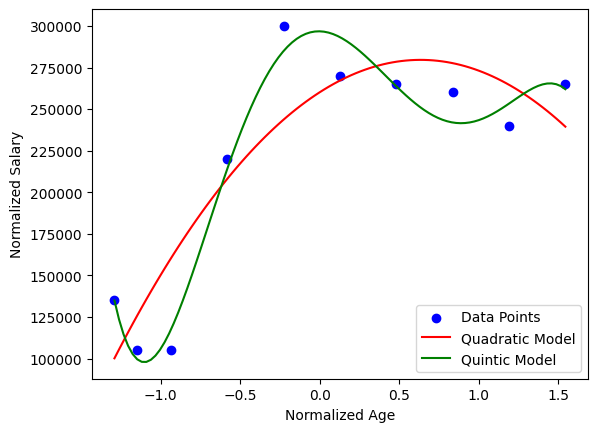

In [ ]:
# Plot the data points
plt.scatter(x, TrainSalary, label='Data Points', color='blue')

# Plot the quadratic model
plt.plot(Xrange, Quadratic_pred, label='Quadratic Model', color='red')

# Plot the quintic model
plt.plot(Xrange, Quintic_Fit, label='Quintic Model', color='green')

# Add labels and legend
plt.xlabel('Normalized Age')
plt.ylabel('Normalized Salary')
plt.legend()

plt.show()



In [ ]:
#Model performance - Quadratic
QuadraticTrainErr = (TrainSalary - QuadraticFit(x)).std(ddof=1)
QuadraticTestErr = (TestSalary - QuadraticTestFit).std(ddof=1)

print("Quadratic Train Error: ",QuadraticTrainErr)
print("Quadratic Test Error: ", QuadraticTestErr )

#Model performance - Quintic
QuinticTrainErr = (TrainSalary - QuinticFit(x)).std(ddof=1)
QuinticTestErr = (TestSalary - QuinticTestFit).std(ddof=1)

print("Quintic Trian Error ", QuinticTrainErr)
print("Quintic Test Error: ",QuinticTestErr)

Quadratic Train Error:  32932.08272044402
Quadratic Test Error:  136516.13069740002
Quintic Trian Error  12902.203044365919
Quintic Test Error:  136516.13069740002


The mean Squared error of the Quintic Model is lower. However the shape of the Quintic function overfits the data a bit too much. Thus the Quadratic fit works better as a more general fit of the data than the Quintic model in this instance.

# Gradient Descent Function


No matter how many iterations, F will never reach zero as the convergence to zero slows down more and more with each iteration. So much so that even after 100 thousand iterations, F does not converge to zero. This is because the rate of change gets slower as you converge to the minimum value of the parabaloid.


In [ ]:
def gradient_descent(x0,y0,a,tol): #Add variable tol which serves as significant digits of accuracy
  xk, yk = 1, 1 #initialize yk and xk to arbitrary value
  erry, errx = 1,1 #Initialize error calculations x and y with arbitrary calculation
  i = 0 # variable to track iterations
  fxy = xk + yk
  while not(errx < 10^-tol and erry < 10^-tol): #Stops loop once error tolerance is fuffilled
    yk = y0 - (a * (2*y0)) #Compute Xk using Xk-1
    xk = x0 - (a * (2*x0)) #Compute Yk using Yk-1
    erry, errx = abs(yk - y0), abs(xk-x0) #Compute the error values for x and y

    fxy = xk + yk #compute value of function

    x0 = xk #change current value of x to previous value of x
    y0 = yk #change current value of y to previous value of y

    i += 1
    if i == 100000 or fxy == 0: # stops loop once max ammount of iterations to prevent infinite loop or if F reaches 0
      return "x:" , xk, 'y:', yk, 'iterations:', i
  return "x:" , xk, 'y:', yk, 'iterations:', i

gradient_descent(1,1,0.01,3) #Sample test with 3 significant digits of tolerance.

('x:', 1.2e-322, 'y:', 1.2e-322, 'iterations:', 100000)


---

